# Programming in Python
## Exam: September 8, 2021


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/3.3.1/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.5/), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [1]:
%matplotlib inline
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

Your research team is studing a new protein, the *exambirulobin*, and they model its trend over time with the following differential equation.

$  \frac{dy}{dt} = a + b\cdot y + c\cdot y^2 $

Assume $a = 0.1$, $b = 0.02$, $c = 0.03$.



### Exercise 1 (max 4 points)

Define a function to compute $\frac{dy}{dt}$ for any $y$. Make the function parametric in $a$, $b$, and $c$, but give them default values. 


To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.

In [2]:
def deriv ( y : float, a : float=0.1, b : float=0.02, c : float=0.03 ) -> float:
    
    """Function that compute the derivative for any y with 3 parametric variables
       >>>deriv(2)
       0.26
    """
    return a+b*y+c*y**2

In [3]:
deriv(4)

0.6599999999999999

### Exercise 2 (max 7 points)


Define a function to approximate the solution of the differential equation by leveraging on the [Euler method](https://en.wikipedia.org/wiki/Euler_method), considering that $\lim_{\Delta t \to 0} f(t + \Delta t) = f(t) + dt\cdot\frac{df}{dt}$. The function should take also the initial value for $t = 0$.

To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.

In [4]:
from typing import Callable

def approx_euler(t: np.ndarray, f0: float, dfun: Callable[[float],float]) -> np.ndarray:
    """Compute the Euler approximation of a function on times t, with derivative dfun.
    """
    res = np.zeros_like(t)
    res[0] = f0

    for i in range(1, len(t)):
        res[i] = res[i-1] + (t[i]-t[i-1])*dfun(res[i-1])

    return res

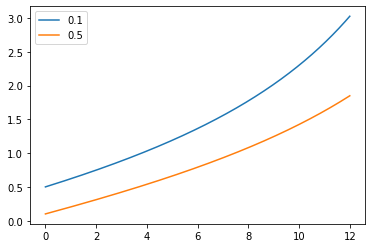

In [5]:
t=np.arange(0,12,.01)
c=approx_euler(t,0.1,deriv)
g=approx_euler(t,0.5,deriv)
plt.plot(t,g,label='0.1')
plt.plot(t,c,label='0.5')
plt.legend()

### Exercise 3 (max 3 points)

Plot the approximate solution, with a $\Delta t = .01$ on $0 \leq t < 15$. The value at $t = 0$ is $0.1$.

In [6]:
len(t)

1200

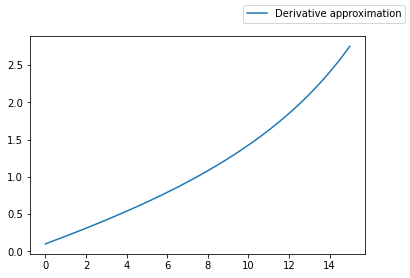

In [7]:
t = np.arange(0, 15, .01)
fig, ax = plt.subplots()

ax.plot(t,approx_euler(t, 0.1,  deriv), label='Derivative approximation')
_ = fig.legend()

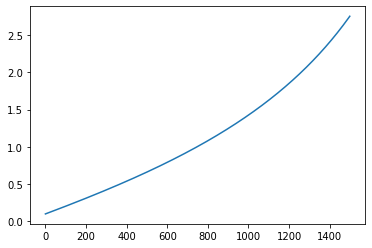

In [8]:
population = approx_euler(t, 0.1, deriv)
fig, ax = plt.subplots()
ax.plot(population)

### Exercise 4 (max 5 points)

Experiments on *exambirulobin* samples resulted in the values stored in a file `values.csv` (first column). The corresponding measurements of the Calcium in the cell were recorded in the second column of `values.csv`. Read the values in the first column in a numpy ndarray.

In [11]:
txt = ";1#2#33#55;"
x=[]

x.append(int(txt.split('#')[2]))



print(x)

[33]


In [22]:
values = []

with open('values.csv') as data_file:
    for line in data_file:
        values.append(float(line.split(',')[0]))
        
ex=np.array(values)
values

[0.1,
 0.1019317,
 0.103864085202442,
 0.10579715861313081,
 0.10773092324188761,
 0.10966538210256968,
 0.11160053821309013,
 0.1135363945954377,
 0.11547295427569658,
 0.11741022028406636,
 0.11934819565488194,
 0.12128688342663356,
 0.12322628664198682,
 0.12516640834780282,
 0.12710725159515832,
 0.12904881943936594,
 0.1309911149399945,
 0.1329341411608892,
 0.13487790117019213,
 0.1368223980403627,
 0.13876763484819804,
 0.14071361467485363,
 0.14266034060586388,
 0.1446078157311628,
 0.14655604314510462,
 0.1485050259464847,
 0.15045476723856033,
 0.1524052701290715,
 0.154356537730262,
 0.1563085731589003,
 0.15826137953630068,
 0.16021495998834437,
 0.1621693176455006,
 0.16412445564284803,
 0.16608037712009585,
 0.1680370852216053,
 0.16999458309641094,
 0.17195287389824232,
 0.17391196078554533,
 0.17587184692150387,
 0.17783253547406153,
 0.17979402961594332,
 0.18175633252467743,
 0.18371944738261708,
 0.18568337737696244,
 0.18764812569978262,
 0.18961369554803767,
 0.191

### Exercise 5 (max 2 points)

Define a Pandas DataFrame with the data in `values.csv` in two columns "exambirulobin" and "calcium".

In [13]:
data =  pd.read_csv('values.csv', sep=',', names=['exambirulobin', 'calcium'])
data.head()

,exambirulobin,calcium
0,0.100000,5.807443
1,0.101932,5.358391
2,0.103864,5.533004
3,0.105797,5.909795
4,0.107731,5.918773


### Exercise 6 (max 3 points)


Add to the dataframe two columns with the difference of the two measures in `values.csv` and the ratio of the difference and the *exambirulobin* value.

In [14]:
data['diff'] = data['calcium'] - data['exambirulobin']
data['ratio'] = data['diff'] / data['exambirulobin']
data.head()

,exambirulobin,calcium,diff,ratio
0,0.100000,5.807443,5.707443,57.074431
1,0.101932,5.358391,5.256459,51.568441
2,0.103864,5.533004,5.429140,52.271577
3,0.105797,5.909795,5.803998,54.859675
4,0.107731,5.918773,5.811042,53.940338


### Exercise 7 (max 3 points)

Make two adjacent plots: one with values of *exambirulobin* taken from `values.csv` and another with the histogram of the ratio computed in Exercise 6.

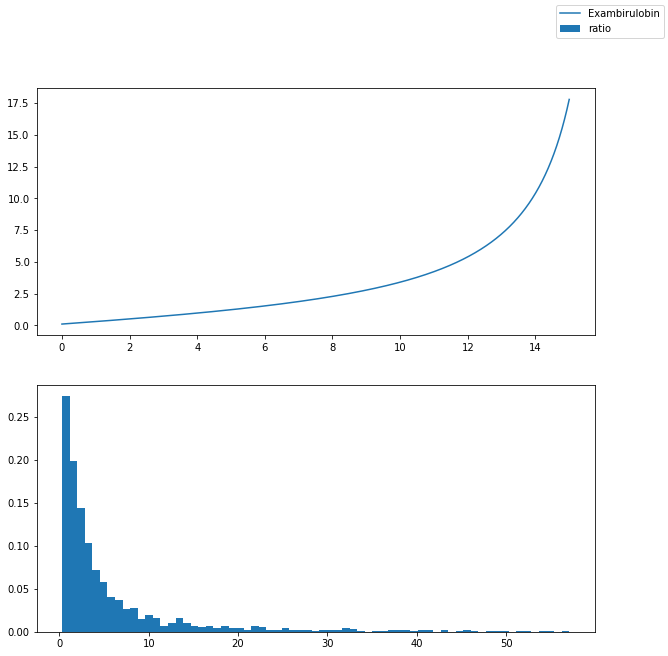

In [30]:
t = np.linspace(0, 15, data['exambirulobin'].count())
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(t, data['exambirulobin'], label='Exambirulobin')
ax[1].hist(data['ratio'], bins='auto', density=True, label='ratio')

_ = fig.legend()

### Exercise 8 (max 5 points)

Consider this statistical model: the ratio computed in Exercise 6 is normally distributed, with an unknown mean, and a standard deviation of 1. Your *a priori* estimation of the mean is a normal distribution with mean 0 and standard deviation 1. Use PyMC to sample the posterior distributions after having seen the actual values of the ratio.  Plot the results.

In [44]:
mymodel = pm.Model()

with mymodel:
    
    mu=pm.Normal('mu',0,1)
    

    
    ratio = pm.Normal('ratio', mu, 1, observed=data['calcium'])
    
    post = pm.sample()

<ipython-input-44-168b01dd9ad4>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  post = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


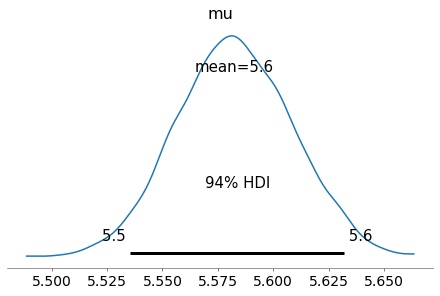

In [45]:
with mymodel:
    pm.plot_posterior(post)